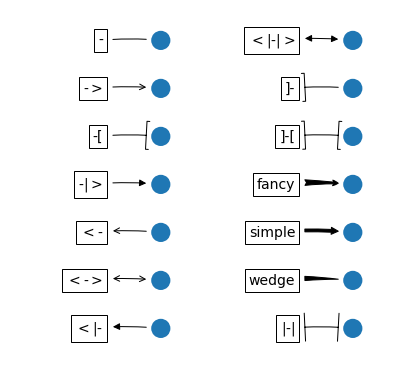

In [4]:
#Code from matplotlib.org

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

styles = mpatches.ArrowStyle.get_styles()

ncol = 2
nrow = (len(styles) + 1) // ncol
figheight = (nrow + 0.5)
fig = plt.figure(figsize=(4 * ncol / 1.5, figheight / 1.5))
fontsize = 0.2 * 70


ax = fig.add_axes([0, 0, 1, 1], frameon=False, aspect=1.)

ax.set_xlim(0, 4 * ncol)
ax.set_ylim(0, figheight)


def to_texstring(s):
    s = s.replace("<", r"$<$")
    s = s.replace(">", r"$>$")
    s = s.replace("|", r"$|$")
    return s


for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
    x = 3.2 + (i // nrow) * 4
    y = (figheight - 0.7 - i % nrow)  # /figheight
    p = mpatches.Circle((x, y), 0.2)
    ax.add_patch(p)

    ax.annotate(to_texstring(stylename), (x, y),
                (x - 1.2, y),
                ha="right", va="center",
                size=fontsize,
                arrowprops=dict(arrowstyle=stylename,
                                patchB=p,
                                shrinkA=5,
                                shrinkB=5,
                                fc="k", ec="k",
                                connectionstyle="arc3,rad=-0.05",
                                ),
                bbox=dict(boxstyle="square", fc="w"))

ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

plt.show()


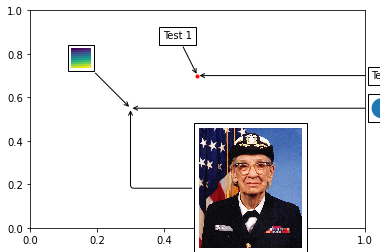

In [3]:
#Code from https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/demo_annotation_box.html#sphx-glr-gallery-text-labels-and-annotations-demo-annotation-box-py
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Circle
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from matplotlib.cbook import get_sample_data


fig, ax = plt.subplots()

# Define a 1st position to annotate (display it with a marker)
xy = (0.5, 0.7)
ax.plot(xy[0], xy[1], ".r")

# Annotate the 1st position with a text box ('Test 1')
offsetbox = TextArea("Test 1", minimumdescent=False)

ab = AnnotationBbox(offsetbox, xy,
                    xybox=(-20, 40),
                    xycoords='data',
                    boxcoords="offset points",
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab)

# Annotate the 1st position with another text box ('Test')
offsetbox = TextArea("Test", minimumdescent=False)

ab = AnnotationBbox(offsetbox, xy,
                    xybox=(1.02, xy[1]),
                    xycoords='data',
                    boxcoords=("axes fraction", "data"),
                    box_alignment=(0., 0.5),
                    arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab)

# Define a 2nd position to annotate (don't display with a marker this time)
xy = [0.3, 0.55]

# Annotate the 2nd position with a circle patch
da = DrawingArea(20, 20, 0, 0)
p = Circle((10, 10), 10)
da.add_artist(p)

ab = AnnotationBbox(da, xy,
                    xybox=(1.02, xy[1]),
                    xycoords='data',
                    boxcoords=("axes fraction", "data"),
                    box_alignment=(0., 0.5),
                    arrowprops=dict(arrowstyle="->"))

ax.add_artist(ab)

# Annotate the 2nd position with an image (a generated array of pixels)
arr = np.arange(100).reshape((10, 10))
im = OffsetImage(arr, zoom=2)
im.image.axes = ax

ab = AnnotationBbox(im, xy,
                    xybox=(-50., 50.),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.3,
                    arrowprops=dict(arrowstyle="->"))

ax.add_artist(ab)

# Annotate the 2nd position with another image (a Grace Hopper portrait)
with get_sample_data("grace_hopper.png") as file:
    arr_img = plt.imread(file, format='png')

imagebox = OffsetImage(arr_img, zoom=0.2)
imagebox.image.axes = ax

ab = AnnotationBbox(imagebox, xy,
                    xybox=(120., -80.),
                    xycoords='data',
                    boxcoords="offset points",
                    pad=0.5,
                    arrowprops=dict(
                        arrowstyle="->",
                        connectionstyle="angle,angleA=0,angleB=90,rad=3")
                    )

ax.add_artist(ab)

# Fix the display limits to see everything
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

plt.show()

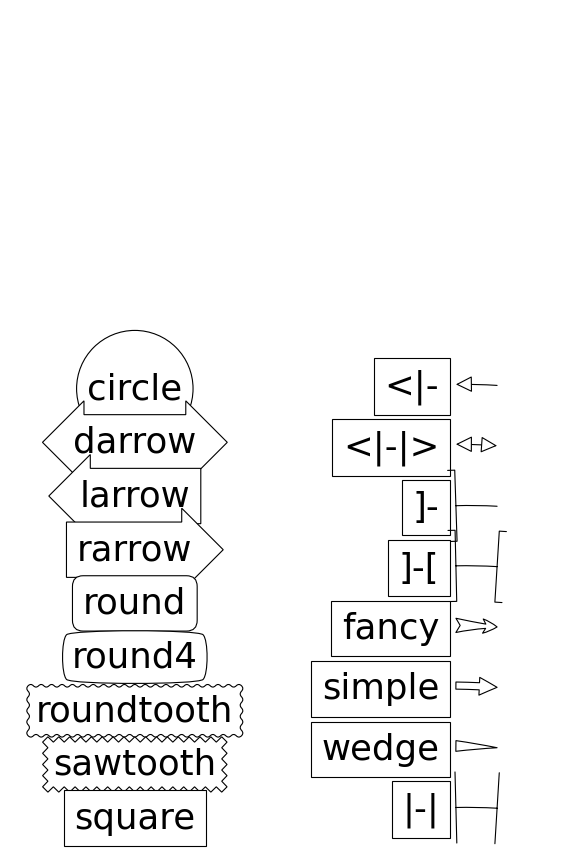

In [2]:
#Code from https://matplotlib.org/3.1.1/gallery/pyplots/whats_new_98_4_fancy.html#sphx-glr-gallery-pyplots-whats-new-98-4-fancy-py
import matplotlib.patches as mpatch
import matplotlib.pyplot as plt

figheight = 8
fig = plt.figure(figsize=(9, figheight), dpi=80)
fontsize = 0.4 * fig.dpi

def make_boxstyles(ax):
    styles = mpatch.BoxStyle.get_styles()

    for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
        ax.text(0.5, (float(len(styles)) - 0.5 - i)/len(styles), stylename,
                  ha="center",
                  size=fontsize,
                  transform=ax.transAxes,
                  bbox=dict(boxstyle=stylename, fc="w", ec="k"))

def make_arrowstyles(ax):
    styles = mpatch.ArrowStyle.get_styles()

    ax.set_xlim(0, 4)
    ax.set_ylim(0, figheight)

    for i, (stylename, styleclass) in enumerate(sorted(styles.items())):
        y = (float(len(styles)) - 0.25 - i)  # /figheight
        p = mpatch.Circle((3.2, y), 0.2, fc="w")
        ax.add_patch(p)

        ax.annotate(stylename, (3.2, y),
                    (2., y),
                    # xycoords="figure fraction", textcoords="figure fraction",
                    ha="right", va="center",
                    size=fontsize,
                    arrowprops=dict(arrowstyle=stylename,
                                    patchB=p,
                                    shrinkA=5,
                                    shrinkB=5,
                                    fc="w", ec="k",
                                    connectionstyle="arc3,rad=-0.05",
                                    ),
                    bbox=dict(boxstyle="square", fc="w"))

    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


ax1 = fig.add_subplot(121, frameon=False, xticks=[], yticks=[])
make_boxstyles(ax1)

ax2 = fig.add_subplot(122, frameon=False, xticks=[], yticks=[])
make_arrowstyles(ax2)


plt.show()